## Titanic

In [26]:
import numpy as np
import pandas as pd

from sklearn import linear_model 
from sklearn import svm
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

import math
import warnings
%matplotlib inline 

import os
import subprocess

### Data Cleaning

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
data = []
data.append(train_df.copy(deep = True))
data.append(test_df.copy(deep = True))

In [5]:
data[0].head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [6]:
data[1].head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [10]:
null_vals = data[0].isnull().sum()
null_vals = null_vals[null_vals > 0]
null_vals.sort_values(inplace=True)

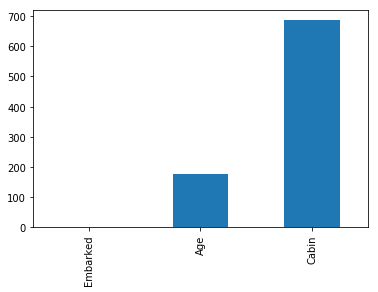

In [12]:
null_vals.plot.bar()

In [13]:
null_vals = data[1].isnull().sum()
null_vals = null_vals[null_vals > 0]
null_vals.sort_values(inplace=True)

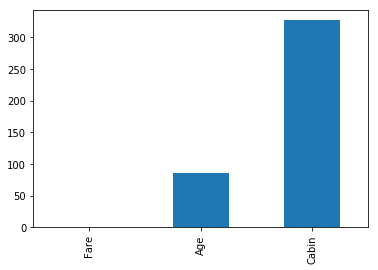

In [14]:
null_vals.plot.bar()

In [15]:
for d in data:
    d['Age'].fillna(d['Age'].median(),inplace=True)
    d['Embarked'].fillna(d['Embarked'].mode()[0],inplace=True)
    d['Fare'].fillna(d['Fare'].median(),inplace=True)

In [16]:
passenger_ids = data[1]['PassengerId']

In [17]:
for d in data:
    d.drop('Cabin',axis = 1,inplace=True)
    d.drop('PassengerId',axis=1,inplace=True)
    d.drop('Ticket',axis=1,inplace=True)

In [18]:
label_encoder = LabelEncoder()

In [19]:
for d in data:
    d['Name'] = label_encoder.fit_transform(d['Name'])
    d['Sex'] = label_encoder.fit_transform(d['Sex'])
    d['Embarked'] = label_encoder.fit_transform(d['Embarked'])

In [20]:
data[0].head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,108,1,22.0,1,0,7.2500,2
1,1,1,190,0,38.0,1,0,71.2833,0
2,1,3,353,0,26.0,0,0,7.9250,2
3,1,1,272,0,35.0,1,0,53.1000,2
4,0,3,15,1,35.0,0,0,8.0500,2
5,0,3,554,1,28.0,0,0,8.4583,1


In [22]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


## Data Exploration

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


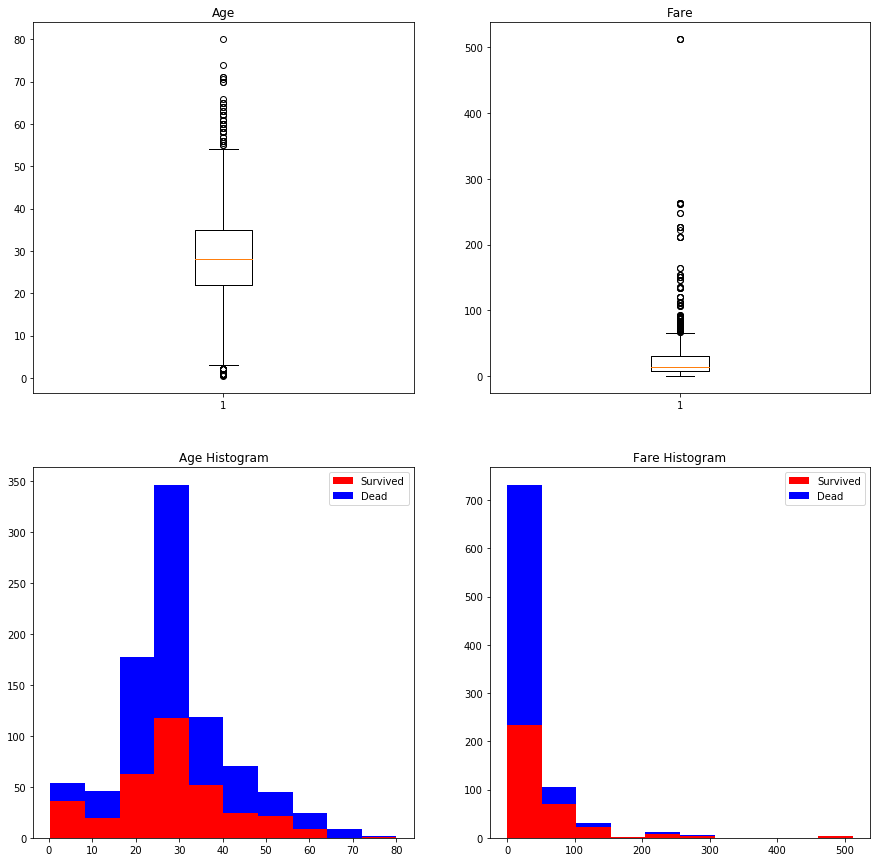

In [23]:
fig,axs = plt.subplots(2,2,figsize=(15,15))

axs[0][0].boxplot(
                                        x=data[0]['Age'],
                                        meanline=True
)
axs[0][0].set_title("Age")

axs[0][1].boxplot(
                                    x= data[0]['Fare'],
                                    meanline=True
)
axs[0][1].set_title("Fare")

axs[1][0].hist(
                            x=[data[0][data[0]["Survived"] == 1]['Age'], data[0][data[0]["Survived"] == 0]['Age']],
                            stacked = True,
                            color = ['r','b'],
                            label = ['Survived','Dead'],
)
axs[1][0].set_title("Age Histogram")
axs[1][0].legend(loc = "upper right")

axs[1][1].hist(
                            x=[data[0][data[0]["Survived"] == 1]['Fare'], data[0][data[0]["Survived"] == 0]['Fare']],
                            stacked = True,
                            color = ['r','b'],
                            label = ['Survived','Dead'],
)
axs[1][1].set_title("Fare Histogram")
axs[1][1].legend(loc="upper right")



Let's observe the distributions of the a couple of features...

Text(0.5,1,'Fare  - JohnsonSU')

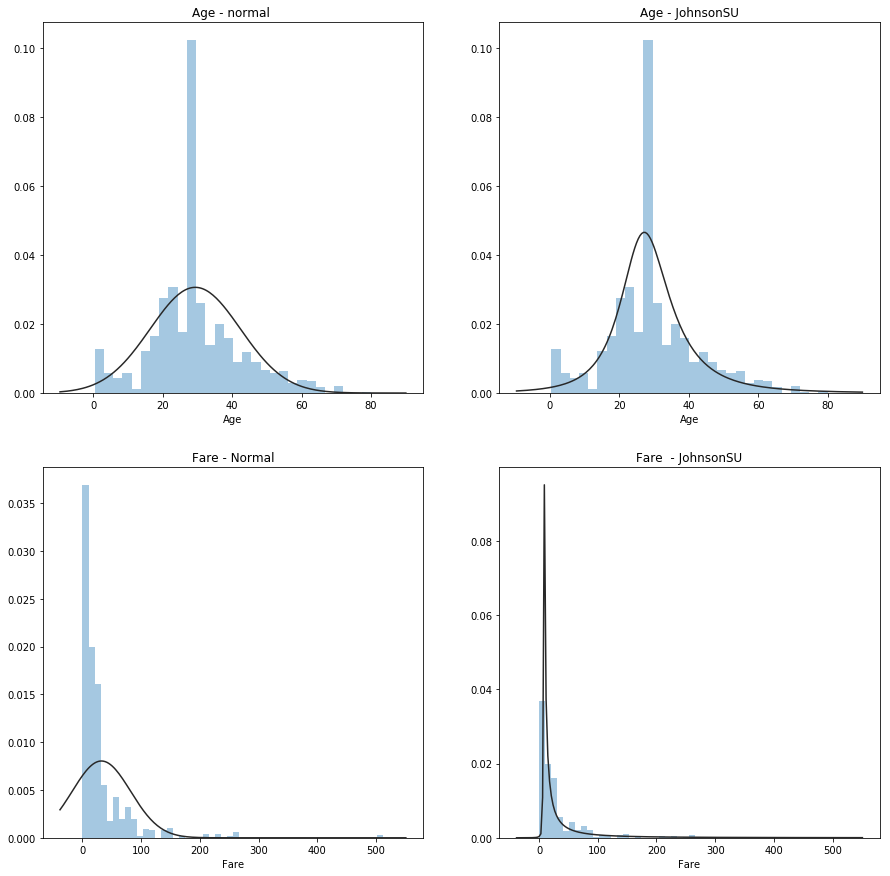

In [32]:
fig,axs = plt.subplots(2,2,figsize = (15,15))

plt1 = axs[0][0]
plt2 = axs[0][1]
plt3 = axs[1][0]
plt4 = axs[1][1]


sns.distplot(
                            data[0]['Age'],
                            kde=False,
                            fit=stats.norm,
                            ax = plt1
)
plt1.set_title("Age - normal ")

sns.distplot(
                        data[0]['Age'],
                        kde=False,
                        fit = stats.johnsonsu,
                        ax = plt2
)
plt2.set_title("Age - JohnsonSU")


sns.distplot(
                            data[0]['Fare'],
                            kde=False,
                            fit=stats.norm,
                            ax = plt3
)
plt3.set_title("Fare - Normal")

sns.distplot(
                            data[0]['Fare'],
                            kde = False,
                            fit = stats.johnsonsu,
                            ax = plt4
)
plt4.set_title("Fare  - JohnsonSU")



- It seems that 'Age' roughly follows a normal distribution
- It seems that 'Age' more closely follows an SU distribution
- It seems that 'Fare' does not follow a normal distribution
- It seems that 'Fare' closely follows an SU distribution

It may be worth it to regularize the 'Age' and 'Fare'

Let's see if any of the other columns follow a normal distribution...

In [35]:
normality_test = lambda x : stats.shapiro(x)[1] < 0.01
normal = data[0].apply(normality_test)
print(not normal.any())

False


Guess not!

## Data Modelling

In [305]:
train_vals = data[0].drop('Survived',axis=1).values
target_vals = data[0]['Survived']

In [306]:
standard_scaler = StandardScaler()
pca = PCA(n_components = 7)

In [307]:
train_vals_std = standard_scaler.fit_transform(train_vals)
principal_components = pca.fit_transform(train_vals_std)

Text(0.5,0,'Principal Components')

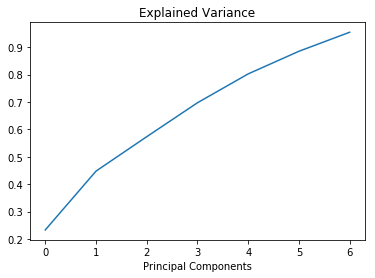

In [308]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance')
plt.xlabel("Principal Components")

In [309]:
mid = math.floor((train_vals.shape[0])/2)

In [310]:
tmp_train = train_vals
tmp_target = target_vals

#cleaned data
train_vals = tmp_train[0 : mid , : ]
test_vals = tmp_train[mid: , : ]
target_vals = tmp_target[0:mid]
test_target_vals = tmp_target[mid:]

#principal components
prncpl_cmpnts_train_vals = principal_components[0:mid,:]
prncpl_cmpnts_test_vals = principal_components[mid:,:]

In [340]:
def test_logistic_model(train_vals,target_vals,test_vals,test_target_vals,params,output):
    '''
            Author: Kyle Ong
            Date: 05/24/2018
            
            will train a linear_model.LogisticRegresssion(penalty=p,C=c,solver='saga') on train_vals and target_vals
            over multiple params
            will ignore ConvergenceWarnings
            
            train_vals: type: np.ndarray
            target_vals: type: np.ndarray
            test_vals: type:np.ndarray
            test_target_vals: type: np.ndarray
            c: type: int
            p: type: string
            params: type: Dict[p:[c]]
            output: type: Bool
            
            return: type: Dict[p:[test_accuracies]]
    '''
    
    test_accuarcy_dict= {}
    
    print("Logistic Regression...")
    
    for k,v in params.items():
        
        loss = k
        model = 1 #tmp
        
        for c in v:
            
            curr_accuracy = 0.0
        
            if k.lower() == "l1":
            
                model = linear_model.LogisticRegression(penalty=loss,C=c,solver='saga')
                
            elif k.lower() == 'l2':
                
                model = linear_model.LogisticRegression(C=c)
            
            with warnings.catch_warnings():
                
                warnings.filterwarnings('ignore',category=ConvergenceWarning)
                
                try:
                    
                    model.fit(train_vals,target_vals)
                    
                    out = model.predict(test_vals)
                    
                    current_accuracy = np.mean(out == test_target_vals)
                    
                    
                except Warning as w:
                    print(w)
                    
            tmp = test_accuarcy_dict.get(k,[])
            tmp.append(current_accuracy)
            test_accuarcy_dict[k] = tmp
            
            if output:
                print("Penalty: {}".format(loss))
                print("C: {}".format(c))
                print("Testing Accuracy: {}".format(current_accuracy))
                print("\n")
        
    return test_accuarcy_dict

In [356]:
def get_optimal_params(test_accuracies,c_vals):
    '''
            Author: Kyle Ong
            Date: 05/24/2018
            
            will find the max_acc of all values in test_accuracies
            will find the corresponding optimal_c 
            will find the corresponding optimal_penalty
            
            vars:
            p: type: string
            a: type: float
            optimal_c: type: float
            optimal_penalty: type: string
            max_acc: type: float
            
            params:
            test_accuracies: type: dict[p:[a]]
            c_vals: type: arr[float]
            
            return:
            optimal_params: type: Dict{}
            
            will raise ValueError if length of c_vals does not equal length of value in test_accuracies
            
            
    ''' 
    
    #book-keeping
    max_acc = 0
    optimal_c = 0.1
    optimal_penalty = 'L1'
    
    #find optimal vals
    for k,v in test_accuracies.items():
        
        if len(c_vals) != len(v):
            raise ValueError("At key: {} ... length of Accuracies:{} != length of c_vals:{}".format(k,len(v),len(c_vals)))
        
        i = 0
        penalty = k
        
        for acc in v:
            
            if acc > max_acc:
                
                max_acc = acc
                optimal_c = c_vals[i]
                optimal_penalty = penalty
                
        i += 1
    
    #format return value
    optimal_params = {
        "accuracy" : max_acc,
        "c": optimal_c,
        "penalty": optimal_penalty
    }
    
    return optimal_params
    
    

In [357]:
c_vals = [0.1,1,10,100]
params = {
    "L1": c_vals,
    "L2":c_vals
}

Logistic Regression...


{'accuracy': 0.7892376681614349, 'c': 0.1, 'penalty': 'L2'}

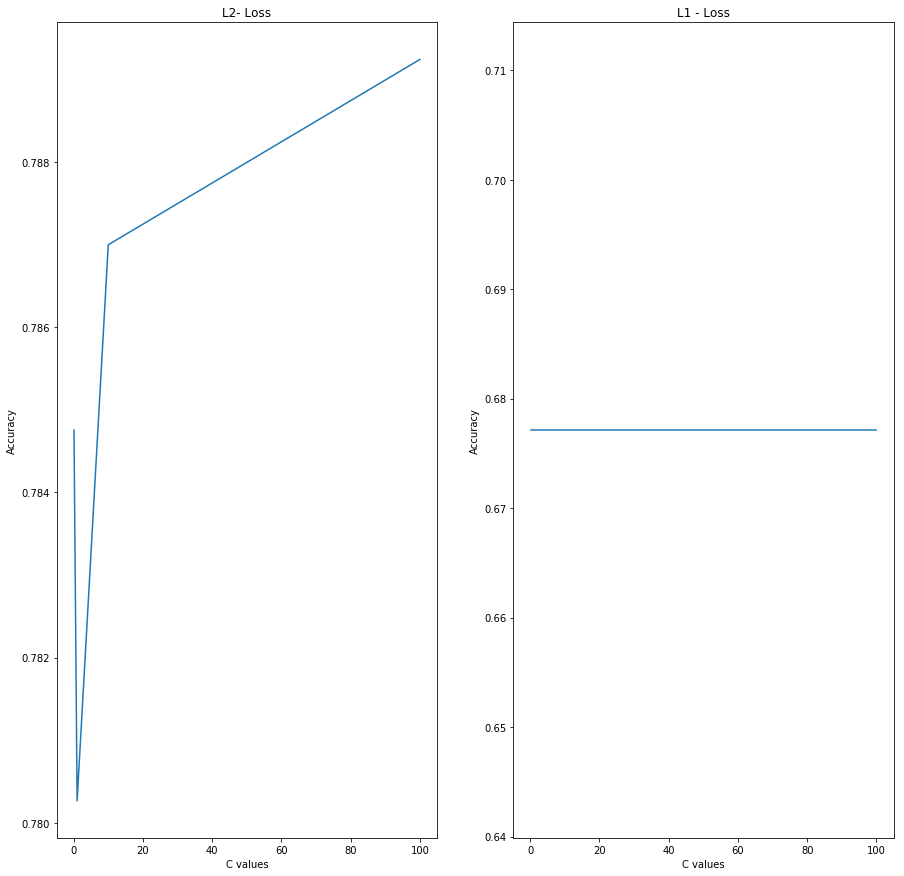

In [361]:
test_accuracies = test_logistic_model(train_vals,target_vals,test_vals,test_target_vals,params,output=False)

fig,ax = plt.subplots(1,2,figsize=(15,15))

ax[0].plot(c_vals, test_accuracies["L2"])
ax[0].set_title("L2- Loss")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("C values")

ax[1].plot(c_vals,test_accuracies['L1'])
ax[1].set_title("L1 - Loss")
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel("C values")



get_optimal_params(test_accuracies,[0.1,1,10,100])

Logistic Regression...


{'accuracy': 0.7847533632286996, 'c': 0.1, 'penalty': 'L1'}

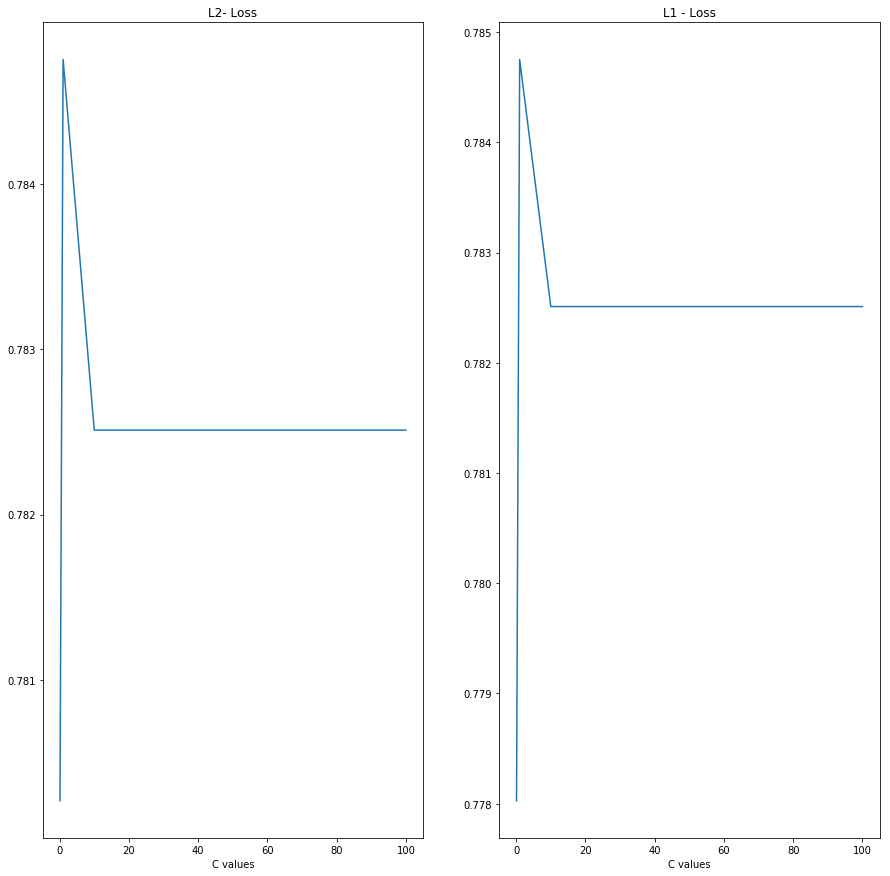

In [363]:
test_accuracies = test_logistic_model(prncpl_cmpnts_train_vals,target_vals,prncpl_cmpnts_test_vals,test_target_vals,params,output=0)

fig,ax = plt.subplots(1,2,figsize=(15,15))

ax[0].plot(c_vals, test_accuracies["L2"])
ax[0].set_title("L2- Loss")
ax[0].set_xlabel("C values")

ax[1].plot(c_vals,test_accuracies['L1'])
ax[1].set_title("L1 - Loss")
ax[1].set_xlabel("C values")


get_optimal_params(test_accuracies,c_vals)
